In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Preprocessing
from pandas import read_csv
from datetime import datetime

def str2time(time_str):
    return datetime.strptime(time_str, '%Y %m %d %H')

def str3time(time_str):
    return datetime.strptime(time_str, '%Y %m')

In [3]:
## combine year, month, day, hour into datetime
Guangzhou = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/GuangzhouPM20100101_20151231.csv", parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=str2time)

In [4]:
dataset = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv",  parse_dates=[['year', 'month']], index_col=0, date_parser=str3time)
#dataset
dataset.dropna(axis=0,subset = ["PM_US Post"], how="any",inplace=True)
dataset.groupby(['year_month']).size()

year_month
2012-05-01      1
2012-06-01    264
2012-07-01    729
2012-08-01    608
2012-09-01    693
2012-10-01    731
2012-11-01    672
2012-12-01    711
2013-01-01    718
2013-02-01    666
2013-03-01    409
2013-04-01    257
2013-05-01    744
2013-06-01    718
2013-07-01    624
2013-08-01    743
2013-09-01    706
2013-10-01    488
2013-11-01    577
2013-12-01    717
2014-01-01    742
2014-02-01    671
2014-03-01    742
2014-04-01    719
2014-05-01    740
2014-06-01    720
2014-07-01    563
2014-08-01    741
2014-09-01    706
2014-10-01    689
2014-11-01    706
2014-12-01    736
2015-01-01    741
2015-02-01    670
2015-03-01    741
2015-04-01    717
2015-05-01    738
2015-06-01    717
2015-07-01    694
2015-08-01    731
2015-09-01    712
2015-10-01    742
2015-11-01    718
2015-12-01    728
dtype: int64

In [5]:
Guangzhou

,No,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year_month_day_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,4.0,NaN,NaN,NaN,9.4,76.0,1015.100000,13.5,NW,0.8,0.0,0.0
2010-01-01 01:00:00,2,4.0,NaN,NaN,NaN,10.2,83.0,1015.200000,13.0,cv,0.5,0.0,0.0
2010-01-01 02:00:00,3,4.0,NaN,NaN,NaN,10.4,87.0,1015.000000,12.5,NW,0.6,0.3,0.3
2010-01-01 03:00:00,4,4.0,NaN,NaN,NaN,10.2,89.0,1014.900000,12.0,NW,1.4,0.6,0.9
2010-01-01 04:00:00,5,4.0,NaN,NaN,NaN,10.4,91.0,1014.600000,11.8,NE,0.6,0.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,4.0,59.0,56.0,59.0,11.0,80.0,1018.299988,14.4,NW,10.9,0.0,0.0
2015-12-31 20:00:00,52581,4.0,58.0,57.0,58.0,11.4,82.0,1018.700012,14.5,NW,12.9,0.0,0.0
2015-12-31 21:00:00,52582,4.0,60.0,56.0,60.0,11.1,78.0,1019.300000,14.9,NW,14.7,0.0,0.0


In [6]:
#Delet non-useful data
Guangzhou.drop(['No', 'season','PM_City Station', 'PM_5th Middle School', 'DEWP', 'HUMI', 'PRES','TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)
Guangzhou

,PM_US Post
year_month_day_hour,
2010-01-01 00:00:00,NaN
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
...,...
2015-12-31 19:00:00,59.0
2015-12-31 20:00:00,58.0
2015-12-31 21:00:00,60.0


In [7]:
## rename columns
Guangzhou.index.name = 'date'

In [8]:
Guangzhou.dropna(axis=0, how="any",inplace=True)

In [9]:
#Guangzhou

In [10]:
Guangzhou.index = pd.to_datetime(Guangzhou.index, 
                             format='%d-%m-%Y %H:%M:%S')
Guangzhou = Guangzhou.set_index(Guangzhou.index).asfreq('H')

#print(by_hour.index)

In [11]:
df = Guangzhou[(Guangzhou.index >=pd.to_datetime('20150504000000')) & (Guangzhou.index <= pd.to_datetime('20150518230000'))]
len(df)

360

In [12]:
df = df.set_index(df.index).asfreq('H')

df = df.fillna(method='ffill')
len(df)

360

In [13]:
df

,PM_US Post
date,
2015-05-04 00:00:00,32.0
2015-05-04 01:00:00,29.0
2015-05-04 02:00:00,25.0
2015-05-04 03:00:00,35.0
2015-05-04 04:00:00,19.0
...,...
2015-05-18 19:00:00,23.0
2015-05-18 20:00:00,27.0
2015-05-18 21:00:00,14.0


In [14]:
################################################################################################################################

In [15]:
##sARIMA Forecast

In [16]:
################################################################################################################################

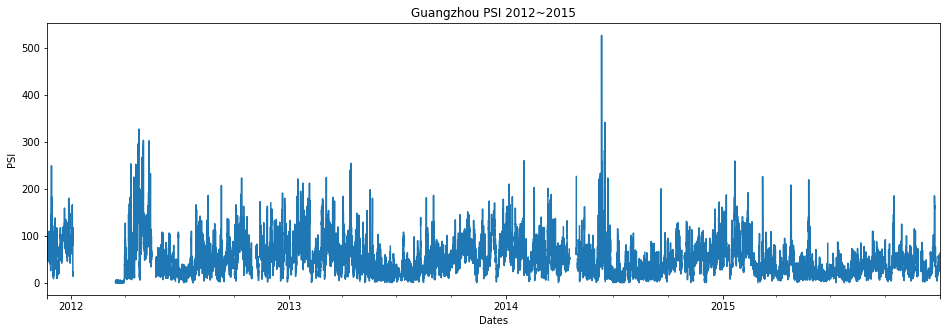

In [17]:
ax = Guangzhou['PM_US Post'].plot(figsize = (16,5), title = "Guangzhou PSI 2012~2015")
ax.set(xlabel='Dates', ylabel='PSI');

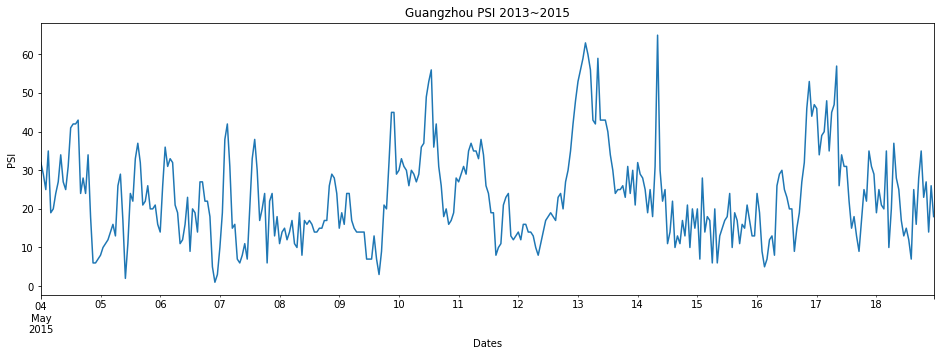

In [18]:
ax = df['PM_US Post'].plot(figsize = (16,5), title = "Guangzhou PSI 2013~2015")
ax.set(xlabel='Dates', ylabel='PSI');

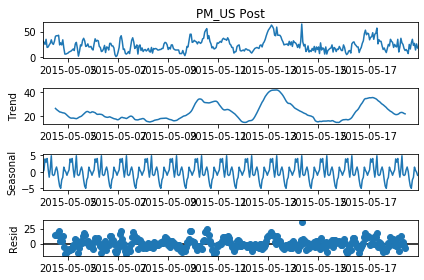

In [19]:
a = seasonal_decompose(df["PM_US Post"], model = "add")
a.plot();

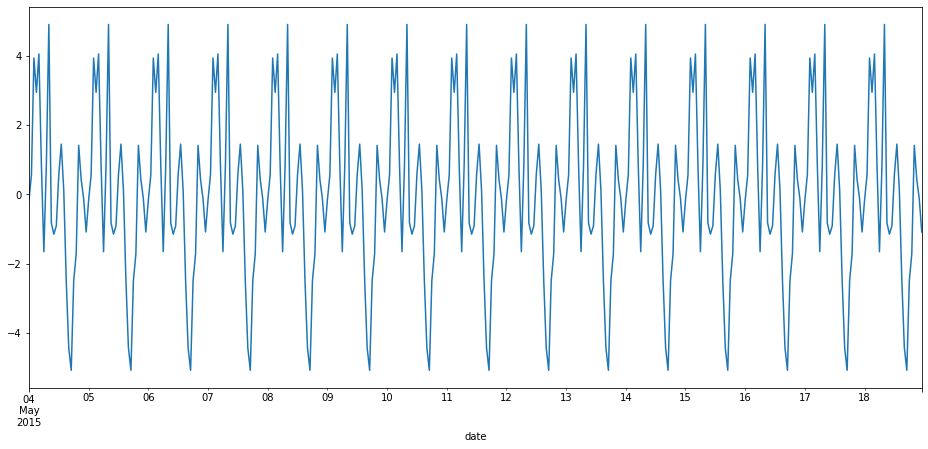

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

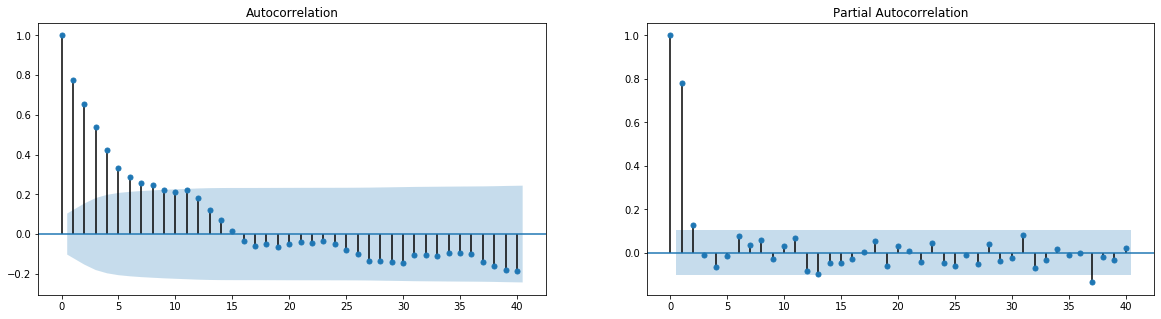

In [21]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(df['PM_US Post'], lags=40, ax=axes[1])
plt.show()

In [22]:
import statsmodels.api as sm

res = sm.tsa.stattools.arma_order_select_ic(df['PM_US Post'], ic=['aic']) 
print (res.aic_min_order)

(2, 0)


In [23]:
#auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 3, max_q = 3, m=24,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 24) (constant=True); AIC=2697.452, BIC=2708.903, Time=3.348 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=2882.558, BIC=2890.192, Time=0.148 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 24) (constant=True); AIC=2455.834, BIC=2471.103, Time=3.379 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 24) (constant=True); AIC=2522.713, BIC=2537.982, Time=5.732 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=False); AIC=2880.714, BIC=2884.531, Time=0.119 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=2530.505, BIC=2541.956, Time=0.591 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 24) (constant=True); AIC=2416.546, BIC=2435.631, Time=10.859 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 24) (constant=True); AIC=2380.879, BIC=2403.782, Time=17.402 seconds
Nea

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1181.644
Date:                              Sat, 25 Apr 2020   AIC                           2375.288
Time:                                      11:45:58   BIC                           2398.190
Sample:                                           0   HQIC                          2384.417
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0358      0.105      0.340      0.734      -0.170       0.242
ar.L1          0.6694      0.047     14.268      0.000       0.577       0.761
ar.L2          0.1471      0.050      2.924      0.003       0.049       0.246
ar.S.L24       0.0012      0.068      0.017      0.986      -0.133       0.135
ma.S.L24      -0.9003      0.093     -9.648      0.000      -1.083      -0.717
sigma2        58.9874      5.280     11.171      0.000      48.638      69.336
===================================================================================
Ljung-Box (Q):                       36.14   Jarque-Bera (JB):                11.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# the best arima model chosen by auto_arima() is SARIMAX(2, 0, 0)x(1, 1, [1], 24)


# split the data into train and test set
train_data = df[:len(df)-72]
test_data = df[len(df)-72:]

arima_model = SARIMAX(train_data['PM_US Post'], order = (2, 0, 0), seasonal_order = (1, 1, [1], 24))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PM_US Post   No. Observations:                  288
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood                -923.238
Date:                              Sat, 25 Apr 2020   AIC                           1856.476
Time:                                      11:46:15   BIC                           1874.356
Sample:                                  05-04-2015   HQIC                          1863.661
                                       - 05-15-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7144      0.048     14.788      0.000       0.620       0.809
ar.L2          0.1129      0.055      2.052      0.040       0.005       0.221
ar.S.L24       0.0312      0.091      0.341      0.733      -0.148       0.210
ma.S.L24      -0.9990     13.714     -0.073      0.942     -27.878      25.880
sigma2        51.0487    697.730      0.073      0.942   -1316.477    1418.574
===================================================================================
Ljung-Box (Q):                       24.59   Jarque-Bera (JB):                22.56
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.17
Prob(H) (two-sided):                  0.71   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.head(5)

2015-05-16 00:00:00    15.621752
2015-05-16 01:00:00    17.534895
2015-05-16 02:00:00    23.173530
2015-05-16 03:00:00    23.363134
2015-05-16 04:00:00    21.977860
Freq: H, Name: ARIMA Predictions, dtype: float64

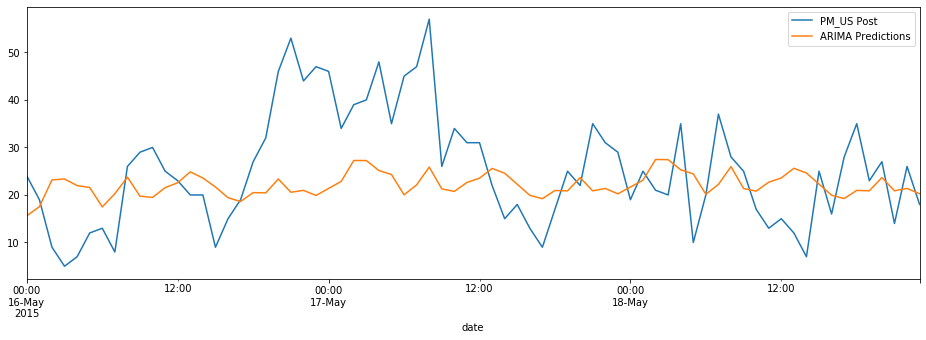

In [26]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [27]:
arima_rmse_error = rmse(test_data['PM_US Post'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 154.526083175651
RMSE Error: 12.430852069574756
Mean: 23.23611111111111


In [28]:
test_data['ARIMA_Predictions'] = arima_pred

In [29]:
################################################################################################################################

In [30]:
##LSTM Forecast

In [31]:
################################################################################################################################

In [32]:
#df

In [33]:
# Scale train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [34]:
# Before creating LSTM model, create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 1
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [35]:
lstm_model.fit_generator(generator,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
287/287 [==============================] - 3s 9ms/step - loss: 0.0502
Epoch 2/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0194
Epoch 3/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0166
Epoch 4/50
287/287 [==============================] - 2s 6ms/step - loss: 0.0149
Epoch 5/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0139
Epoch 6/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0134
Epoch 7/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0133
Epoch 8/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0130
Epoch 9/50
287/287 [==============================] - 2s 5ms/step - loss: 0.0131
Epoch 10/50
287/287 [==============================] - 1s 5ms/step - loss: 0.0130A: 0s - loss:
Epoch 11/50
287/287 [==============================] - 2s 6ms/step - loss: 0.0129
Epoch 12/50
287/287 [=========================

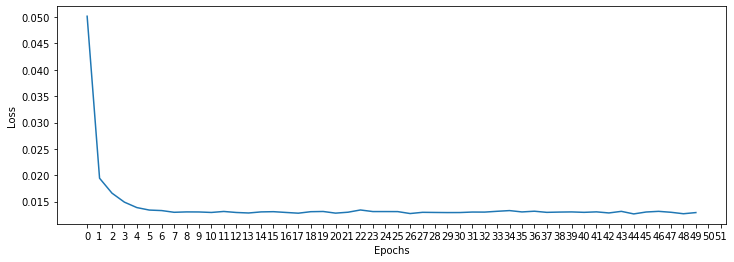

In [36]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,200,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [37]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [38]:
lstm_predictions_scaled

[array([0.23622528], dtype=float32),
 array([0.2708659], dtype=float32),
 array([0.29602835], dtype=float32),
 array([0.314586], dtype=float32),
 array([0.32842395], dtype=float32),
 array([0.33882636], dtype=float32),
 array([0.34669334], dtype=float32),
 array([0.35266986], dtype=float32),
 array([0.3572257], dtype=float32),
 array([0.36070758], dtype=float32),
 array([0.3633739], dtype=float32),
 array([0.3654188], dtype=float32),
 array([0.36698887], dtype=float32),
 array([0.36819547], dtype=float32),
 array([0.36912337], dtype=float32),
 array([0.3698373], dtype=float32),
 array([0.37038687], dtype=float32),
 array([0.37081], dtype=float32),
 array([0.3711359], dtype=float32),
 array([0.3713869], dtype=float32),
 array([0.37158027], dtype=float32),
 array([0.37172928], dtype=float32),
 array([0.37184408], dtype=float32),
 array([0.37193257], dtype=float32),
 array([0.37200075], dtype=float32),
 array([0.37205327], dtype=float32),
 array([0.37209377], dtype=float32),
 array([0.372

In [39]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[16.11841774],
       [18.33541679],
       [19.94581413],
       [21.13350487],
       [22.01913261],
       [22.68488693],
       [23.18837357],
       [23.57087135],
       [23.86244392],
       [24.08528519],
       [24.25592995],
       [24.38680267],
       [24.48728752],
       [24.56451035],
       [24.62389565],
       [24.66958809],
       [24.7047596 ],
       [24.73184013],
       [24.75269699],
       [24.76876068],
       [24.78113747],
       [24.79067421],
       [24.79802132],
       [24.80368423],
       [24.80804825],
       [24.811409  ],
       [24.81400108],
       [24.81599998],
       [24.81753922],
       [24.81872749],
       [24.81964111],
       [24.82034492],
       [24.82088661],
       [24.82130432],
       [24.82162857],
       [24.82187843],
       [24.82207108],
       [24.82221794],
       [24.82233238],
       [24.82242012],
       [24.82248688],
       [24.82254028],
       [24.82257843],
       [24.82260895],
       [24.82263374],
       [24

In [40]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,PM_US Post,ARIMA_Predictions,LSTM_Predictions
date,,,
2015-05-16 00:00:00,24.0,15.621752,16.118418
2015-05-16 01:00:00,19.0,17.534895,18.335417
2015-05-16 02:00:00,9.0,23.173530,19.945814
2015-05-16 03:00:00,5.0,23.363134,21.133505
2015-05-16 04:00:00,7.0,21.977860,22.019133
...,...,...,...
2015-05-18 19:00:00,23.0,20.877015,24.822699
2015-05-18 20:00:00,27.0,23.658163,24.822699
2015-05-18 21:00:00,14.0,20.881188,24.822699


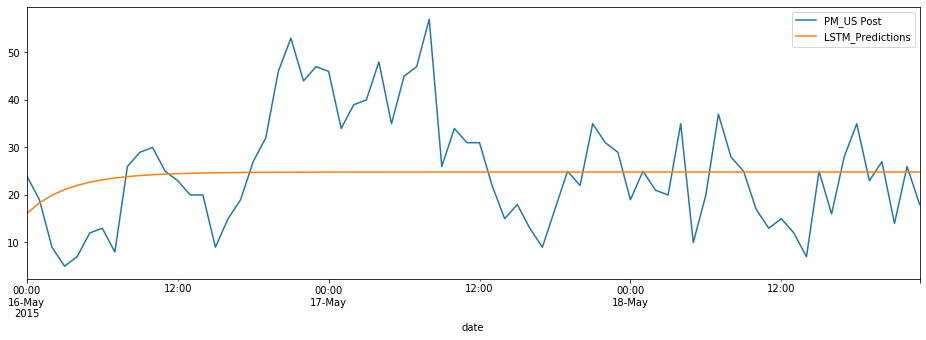

In [41]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [42]:
lstm_rmse_error = rmse(test_data['PM_US Post'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 138.41677994543343
RMSE Error: 11.765066083343239
Mean: 23.23611111111111


#### 

In [43]:
##Prophet Forecast

In [44]:
################################################################################################################################

In [45]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-72]
test_data_pr = df_pr.iloc[len(df)-72:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72,freq='H')
prophet_pred = m.predict(future)
prophet_pred.tail()

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2015-05-18 19:00:00,23.656614,8.010896,36.761902,23.566393,23.748630,-1.151295,-1.151295,-1.151295,-1.151295,-1.151295,-1.151295,0.0,0.0,0.0,22.505320
356,2015-05-18 20:00:00,23.655553,9.358691,37.180190,23.563406,23.749693,-0.253025,-0.253025,-0.253025,-0.253025,-0.253025,-0.253025,0.0,0.0,0.0,23.402528
357,2015-05-18 21:00:00,23.654491,6.700127,36.682517,23.559338,23.750762,-1.216265,-1.216265,-1.216265,-1.216265,-1.216265,-1.216265,0.0,0.0,0.0,22.438226
358,2015-05-18 22:00:00,23.653429,6.090620,36.140494,23.556496,23.751835,-2.889242,-2.889242,-2.889242,-2.889242,-2.889242,-2.889242,0.0,0.0,0.0,20.764187
359,2015-05-18 23:00:00,23.652368,5.973134,35.913522,23.553214,23.751845,-3.180675,-3.180675,-3.180675,-3.180675,-3.180675,-3.180675,0.0,0.0,0.0,20.471693


In [46]:
#df_pr

In [47]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-72:]['ds'], "Pred" : prophet_pred[-72:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "H"
prophet_pred

,Pred
Date,
2015-05-16 00:00:00,22.661843
2015-05-16 01:00:00,26.098283
2015-05-16 02:00:00,28.574393
2015-05-16 03:00:00,28.591418
2015-05-16 04:00:00,26.629367
...,...
2015-05-18 19:00:00,22.505320
2015-05-18 20:00:00,23.402528
2015-05-18 21:00:00,22.438226


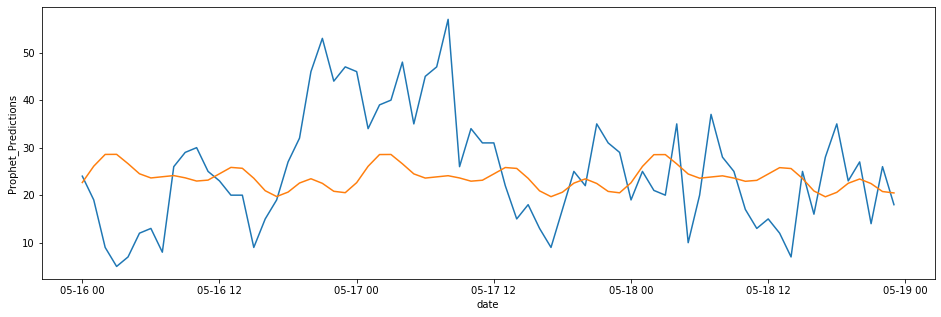

In [48]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["PM_US Post"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [49]:
prophet_rmse_error = rmse(test_data['PM_US Post'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 157.42171407751118
RMSE Error: 12.546781024530203
Mean: 23.23611111111111


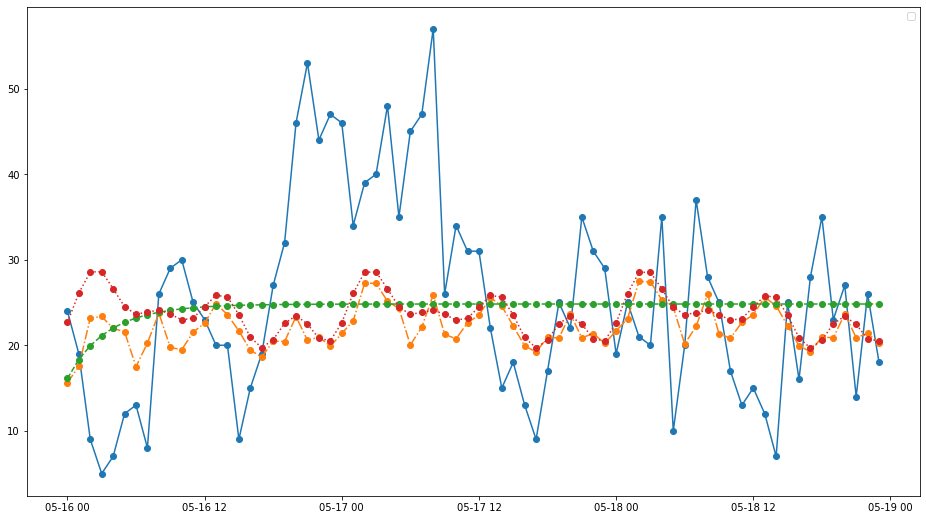

In [50]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["PM_US Post"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [51]:
print(f"Mean: {test_data['PM_US Post'].mean()}")
errors

Mean: 25.375


,Models,RMSE Errors,MSE Errors
0,ARIMA,12.430852,154.526083
1,LSTM,11.765066,138.416780
2,Prophet,12.546781,157.421714


In [52]:
test_data.head(50)

,PM_US Post,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
date,,,,
2015-05-16 00:00:00,24.0,15.621752,16.118418,22.661843
2015-05-16 01:00:00,19.0,17.534895,18.335417,26.098283
2015-05-16 02:00:00,9.0,23.173530,19.945814,28.574393
2015-05-16 03:00:00,5.0,23.363134,21.133505,28.591418
2015-05-16 04:00:00,7.0,21.977860,22.019133,26.629367
2015-05-16 05:00:00,12.0,21.581040,22.684887,24.504201
2015-05-16 06:00:00,13.0,17.484747,23.188374,23.624516
2015-05-16 07:00:00,8.0,20.268197,23.570871,23.875419
2015-05-16 08:00:00,26.0,23.748354,23.862444,24.120822
